In [34]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 2.0 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21/21 [gradio]20/21 [gradio]px]e-hub]


# 🔥 Thermal Human Detection with YOLOv5

## 1. Load YOLOv5 and Run Inference
- Using trained model on thermal images
- Test image: `test1.jpg`

In [2]:
# Detection Code
!python /Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/detect.py \
  --weights /Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/runs/train/thermal_yolo_cpu/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /Users/pawandinendra/Desktop/thermal/test1.jpg \
  --save-txt \
  --save-conf \
  --project yolov5/runs/detect \
  --name demo \
  --exist-ok


detect: weights=['/Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/runs/train/thermal_yolo_cpu/weights/best.pt'], source=/Users/pawandinendra/Desktop/thermal/test1.jpg, data=thermal_dataset/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=demo, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/pawandinendra/Desktop/thermal/test1.jpg: 480x640 7 human_heats, 100.8ms
Speed: 0.9ms pre-process, 100.8ms inference, 5.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/d

## 2. Convert YOLO Labels to CSV
- Extract predicted bounding boxes
- Include confidence scores and image name


In [3]:
# Convert output labels to CSV
import os
import pandas as pd

labels_path = 'yolov5/runs/detect/demo/labels/'
detected_files = os.listdir(labels_path)

rows = []

for file in detected_files:
    if file.endswith(".txt"):
        image_name = file.replace(".txt", "")
        with open(os.path.join(labels_path, file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 6:
                    cls, x, y, w, h, conf = map(float, parts)
                    rows.append({
                        'image': image_name,
                        'class': int(cls),
                        'x_center': x,
                        'y_center': y,
                        'width': w,
                        'height': h,
                        'confidence': conf
                    })

# Save to CSV
df = pd.DataFrame(rows)
df.to_csv('detection_results.csv', index=False)
df.head()


,image,class,x_center,y_center,width,height,confidence
0,test1,0,0.123366,0.500000,0.116013,0.372549,0.282166
1,test1,0,0.638072,0.495643,0.158497,0.442266,0.338062
2,test1,0,0.537582,0.480392,0.101307,0.389978,0.411750
3,test1,0,0.044935,0.490196,0.089869,0.326797,0.504023
4,test1,0,0.642974,0.617647,0.119281,0.246187,0.504769


## 3. Output Image with Detections
- View detection result


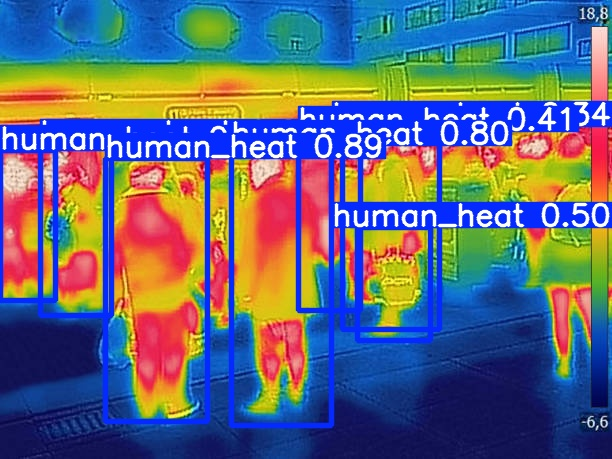

In [4]:
from IPython.display import Image
Image(filename='yolov5/runs/detect/demo/test1.jpg', width=600)


detect: weights=['/Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/runs/train/thermal_yolo_cpu/weights/best.pt'], source=/Users/pawandinendra/Desktop/thermal/test2.jpg, data=thermal_dataset/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=thermal_dataset/yolov5/runs/detect, name=demo, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/pawandinendra/Desktop/thermal/test2.jpg: 480x640 (no detections), 465.2ms
Speed: 1.2ms pre-process, 465.2ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to th

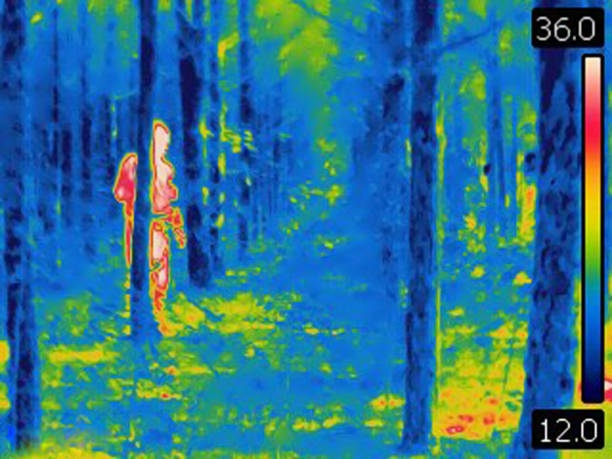

In [28]:
# Step 1: Run detection on a new image (example: test2.jpg)
!python  /Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/detect.py \
  --weights /Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/runs/train/thermal_yolo_cpu/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /Users/pawandinendra/Desktop/thermal/test2.jpg \
  --save-txt \
  --save-conf \
  --name demo \
  --exist-ok

# Step 2: Display detected image with bounding boxes
from IPython.display import Image, display
import os

image_filename = "test2.jpg"
detected_image_folder = "thermal/yolov5/runs/detect/demo/"
detected_image_path = "thermal_dataset/yolov5/runs/detect/demo/test2.jpg"

#detected_image_path = os.path.join(detected_image_folder, image_filename)

if os.path.exists(detected_image_path):
    display(Image(filename=detected_image_path, width=600))
else:
    print("❌ Detected image not found at:", detected_image_path)


Here’s a full self-contained code snippet you can use in Jupyter Notebook or a Python script:#

In [ ]:
import torch
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

def detect_image(image_path, weights_path, conf_thres=0.25, save_dir="runs/detect", show_img=True):
    os.makedirs(save_dir, exist_ok=True)
    
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)
    model.conf = conf_thres
    
    results = model(image_path)
    results.save(save_dir)
    
    exp_folders = sorted([f for f in Path(save_dir).iterdir() if f.is_dir()], key=os.path.getmtime)
    newest_exp = exp_folders[-1]  
    image_name = Path(image_path).name
    saved_img_path = newest_exp / image_name
    
    print(f"Saved detected image at: {saved_img_path}")
    
    # Get detection results DataFrame
    df = results.pandas().xyxy[0]  # xmin, ymin, xmax, ymax, confidence, class, name
    
    # Save CSV file next to the image
    csv_path = newest_exp / (image_name.rsplit('.', 1)[0] + '_detections.csv')
    df.to_csv(csv_path, index=False)
    print(f"Detection results saved to CSV: {csv_path}")
    
    # Show image with bounding boxes
    if show_img:
        img = Image.open(saved_img_path)
        plt.figure(figsize=(10,10))
        plt.axis('off')
        plt.imshow(img)
        plt.show()
    
    return df, saved_img_path

def detect_images_in_folder(folder_path, weights_path, conf_thres=0.25, save_dir="runs/detect", show_img=True):
    folder = Path(folder_path)
    results_summary = []
    for img_path in folder.glob("*.*"):
        if img_path.suffix.lower() not in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']:
            continue
        print(f"Processing {img_path}")
        df, saved_img_path = detect_image(str(img_path), weights_path, conf_thres, save_dir, show_img)
        results_summary.append((img_path.name, df))
    return results_summary

# Example usage for a single image
image_path = "/Users/pawandinendra/Desktop/thermal/test3.jpg"
weights_path = "/Users/pawandinendra/Desktop/thermal/thermal_dataset/yolov5/runs/train/thermal_yolo_cpu/weights/best.pt"
detect_image(image_path, weights_path, conf_thres=0.1)

# Example usage for batch processing
#folder_path = "/Users/pawandinendra/Desktop/thermal/test_images_folder"
#detect_images_in_folder(folder_path, weights_path, conf_thres=0.1)

import gradio as gr

def gradio_detect(image):
    image.save("temp.jpg")  # Save uploaded image temporarily
    df, saved_img_path = detect_image("temp.jpg", weights_path, conf_thres=0.1, show_img=False)
    return saved_img_path, df.to_dict()

iface = gr.Interface(
    fn=gradio_detect, 
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil", label="Detected Image"), gr.Dataframe(headers=["xmin","ymin","xmax","ymax","confidence","class","name"])],
    title="Thermal Human Detection",
    description="Upload a thermal image and the model will detect humans with bounding boxes."
)

iface.launch()



Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/pawandinendra/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-9-17 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/Users/pawandinendra/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp39


Saved detected image at: runs/detect/exp39/test3.jpg
Detection results saved to CSV: runs/detect/exp39/test3_detections.csv
* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/pawandinendra/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-9-17 Python-3.12.2 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/Users/pawandinendra/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp40


Saved detected image at: runs/detect/exp40/temp.jpg
Detection results saved to CSV: runs/detect/exp40/temp_detections.csv
